<a href="https://colab.research.google.com/github/XavierCarrera/natural-language-processing/blob/main/N_grames_and_Language_Collocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk 
nltk.download("book")
from nltk.book import *
from nltk.util import ngrams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
md_bigrams = list(bigrams(text1))

In [5]:
fdist = FreqDist(md_bigrams)

In [6]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

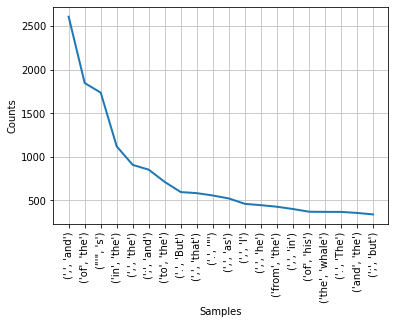

In [7]:
fdist.plot(20)

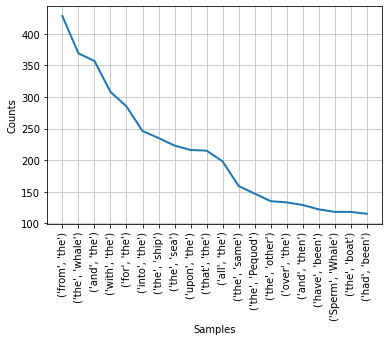

In [8]:
# Bigrams Filtering

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

In [10]:
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

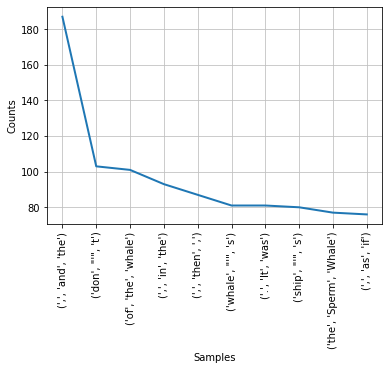

In [12]:
fdist.plot(10)

In [24]:
filtered_bigrams_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word) > threshold]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df["bi_grams"] = list(set(filtered_bigrams))
df["word_0"] = df["bi_grams"].apply(lambda x: x[0])
df["word_1"] = df["bi_grams"].apply(lambda x: x[1])
df["bi_gram_freq"] = df["bi_grams"].apply(lambda x: filtered_bigrams_dist[x])
df["word_0_freq"] = df["word_0"].apply(lambda x: filtered_words_dist[x])
df["word_1_freq"] = df["word_1"].apply(lambda x: filtered_words_dist[x])

In [22]:
df

bi_grams      word_0  ... word_0_freq  word_1_freg
0             (have, shed)        have  ...         760            4
1         (sported, there)     sported  ...           1          715
2         (bland, deceits)       bland  ...           2            2
3         (wondrous, feat)    wondrous  ...          41            6
4         (keep, trimming)        keep  ...          66            1
...                    ...         ...  ...         ...          ...
67937  (Sciences, setting)    Sciences  ...           1           11
67938  (hinted, influence)      hinted  ...          25            9
67939       (reapers, and)     reapers  ...           1         6024
67940    (quickening, sun)  quickening  ...           2          102
67941     (but, obliquely)         but  ...        1113            8

[67942 rows x 6 columns]

In [31]:
# Pointwise Mutual Information

df["PMI"] = df[["bi_gram_freq", "word_0_freq", "word_1_freq"]].apply(lambda x: np.log2(x.values[0]/(x.values[1] * x.values[2])), axis = 1)

df["log(bi_gram_freq"] = df["bi_gram_freq"].apply(lambda x: np.log2(x))

df


bi_grams      word_0  ...        PMI  log(bi_gram_freq
0             (have, shed)        have  ... -11.569856               0.0
1         (sported, there)     sported  ...  -9.481799               0.0
2         (bland, deceits)       bland  ...  -2.000000               0.0
3         (wondrous, feat)    wondrous  ...  -7.942515               0.0
4         (keep, trimming)        keep  ...  -6.044394               0.0
...                    ...         ...  ...        ...               ...
67937  (Sciences, setting)    Sciences  ...  -3.459432               0.0
67938  (hinted, influence)      hinted  ...  -7.813781               0.0
67939       (reapers, and)     reapers  ... -12.556506               0.0
67940    (quickening, sun)  quickening  ...  -7.672425               0.0
67941     (but, obliquely)         but  ... -13.120238               0.0

[67942 rows x 8 columns]

In [32]:
df.sort_values(by = "PMI", ascending=False)

df

bi_grams      word_0  ...        PMI  log(bi_gram_freq
0             (have, shed)        have  ... -11.569856               0.0
1         (sported, there)     sported  ...  -9.481799               0.0
2         (bland, deceits)       bland  ...  -2.000000               0.0
3         (wondrous, feat)    wondrous  ...  -7.942515               0.0
4         (keep, trimming)        keep  ...  -6.044394               0.0
...                    ...         ...  ...        ...               ...
67937  (Sciences, setting)    Sciences  ...  -3.459432               0.0
67938  (hinted, influence)      hinted  ...  -7.813781               0.0
67939       (reapers, and)     reapers  ... -12.556506               0.0
67940    (quickening, sun)  quickening  ...  -7.672425               0.0
67941     (but, obliquely)         but  ... -13.120238               0.0

[67942 rows x 8 columns]

In [35]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq'], color = df["PMI"]+df["log(bi_gram_freq"], 
                 hover_name = df["bi_grams"].values, width = 600, height = 600, labels={"x": "PMI", "y": "log(bi_gram_freq"})
fig.show()

In [37]:
# Prebuild NLTK Measures

from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [38]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]